## 命名空間（Namespace）

### 定義與基本概念
在程式設計中，命名空間（Namespace）是一種從名稱到物件的映射。這種映射通常以 Python 字典的形式實現。命名空間提供了一種有效的方法來避免名稱衝突，確保在同一程序中不同部分使用的名稱互不干擾。

### 命名空間的功能
主要功能是組織和管理名稱，以防止名稱衝突。每個命名空間是獨立的，這意味著一個命名空間中的名稱不會影響其他命名空間中的名稱。例如，兩個不同的模組可以有相同的變量名稱，而不會互相干擾。

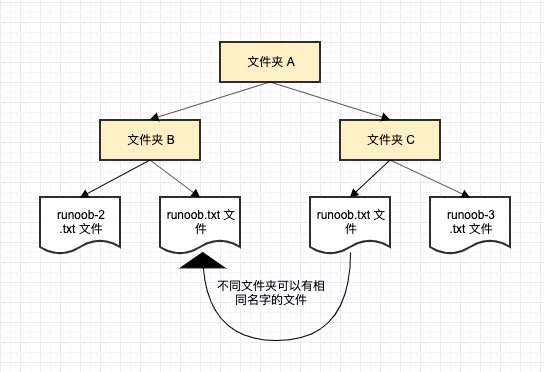

### 命名空間的類型

- 內建命名空間（Built-in Namespace）：包含 Python 內建函數和異常的名稱。這些名稱在所有的 Python 程式中都是可用的。

- 全局命名空間（Global Namespace）：包含模組層級的名稱。這些名稱在模組的整個生命週期中都有效。

- 局部命名空間（Local Namespace）：包含函數或方法內部的名稱。這些名稱僅在函數或方法的執行期間有效。


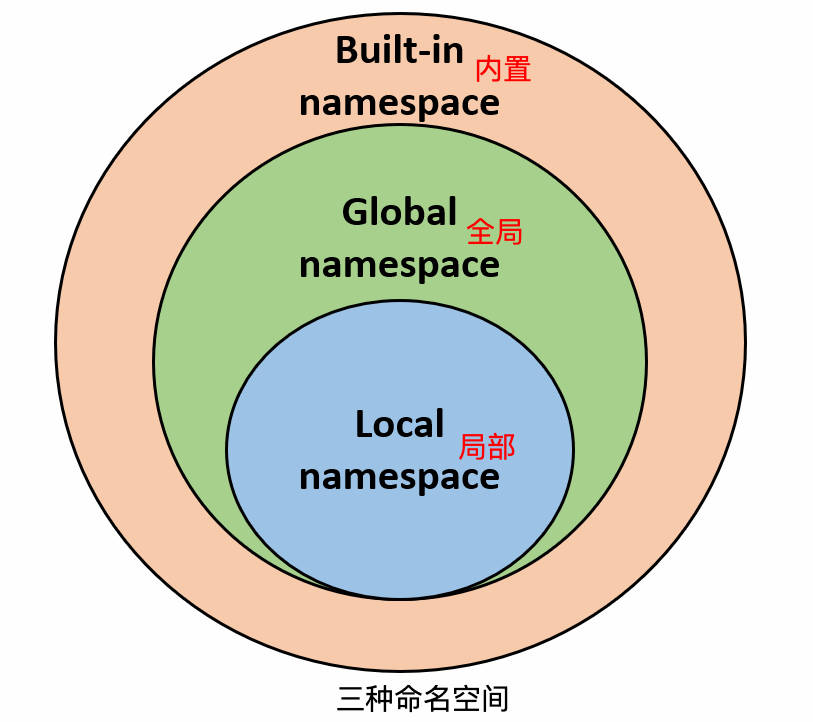




In [1]:
# 內建命名空間 example
print(len("Hello"))  # len 是內建函數

# 全局命名空間  example
x = 10  # x 是全局變量

def outer_function():
    # 局部命名空間  example
    y = 5  # y 是 outer_function 的局部變量
    
    def inner_function():
        z = y + x  # y 是 outer_function 的局部變量，x 是全局變量
        print(z)
    
    inner_function()

outer_function()


5
15


>  len 是一個內建函數，屬於內建命名空間。 <br>
>  x 是一個全局變量，屬於全局命名空間。<br>
>  y 和 z 是局部變量，分別屬於 outer_function 和 inner_function 的局部命名空間。<br>

### 命名空間與作用域
命名空間與作用域密切相關。作用域是變量的可見範圍，而命名空間則是名稱到物件的映射。Python 通過使用 LEGB 規則（Local, Enclosing, Global, Built-in）來決定變量的作用域：

- 局部作用域（Local Scope）：最內層的命名空間，即函數或方法內部。
- 閉包作用域（Enclosing Scope）：包含內嵌函數的函數內部。
- 全局作用域（Global Scope）：模組的最外層。
- 內建作用域（Built-in Scope）：Python 的內建命名空間。


#### LEGB 規則
假設我們要使用變量 sys_time，則 Python 的查找順序為：局部命名空間 -> 閉包作用域 -> 全局命名空間 -> 內建命名空間。如果找不到變量 sys_time，則它將放棄查找並引發一個 NameError 異常。


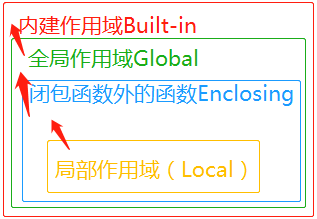

In [2]:
import time

sys_time = "全局時間"

def outer_function():
    sys_time = "閉包時間"
    
    def inner_function():
        sys_time = time.ctime()  # 局部時間
        print("內部函數的 sys_time:", sys_time)
    
    inner_function()
    print("外部函數的 sys_time:", sys_time)

outer_function()
print("全局的 sys_time:", sys_time)


內部函數的 sys_time: Thu Jul 25 19:26:20 2024
外部函數的 sys_time: 閉包時間
全局的 sys_time: 全局時間


### 全局變量和局部變量
在 Python 中，定義在函數內部的變量擁有一個局部作用域，定義在函數外的變量擁有全局作用域。

局部變量只能在其被聲明的函數內部訪問。
全局變量可以在整個程式範圍內訪問。

In [3]:
#!/usr/bin/python3

total = 0  # 這是一個全局變量

# 可寫函數說明
def sum(arg1, arg2):
    # 返回2個參數的和
    total = arg1 + arg2  # total在這裡是局部變量
    print("函數內是局部變量:", total)
    return total

# 調用sum函數
sum(10, 20)
print("函數外是全局變量:", total)



函數內是局部變量: 30
函數外是全局變量: 0


> 全局變量：在函數外部定義的 total 是一個全局變量，初始值為 0。<br>
> 局部變量：在函數 sum 內部定義的 total 是一個局部變量，用於存儲 arg1 和 arg2 的和。<br>

### global 和 nonlocal 關鍵字
當內部作用域想修改外部作用域的變量時，需要使用 global 和 nonlocal 關鍵字。

#### 使用 global 關鍵字
global 關鍵字用於聲明某個變量是全局變量，使得在函數內部能夠修改全局變量。

In [5]:
#!/usr/bin/python3

num = 1

def fun1():
    global num  # 需要使用 global 關鍵字聲明
    print(num)
    num = 123
    print(num)

fun1()
print(num)



1
123
123


#### 使用 nonlocal 關鍵字
nonlocal 關鍵字用於在嵌套函數中，聲明某個變量是最近一層外部函數的變量，使得內部函數可以修改這個外部函數的變量。

In [7]:
def outer():
    num = 10
    
    def inner():
        nonlocal num  # 需要使用 nonlocal 關鍵字聲明
        print(num)
        num = 20
        print(num)
    
    inner()
    print(num)

outer()



10
20
20


> 閉包變量：在外部函數 outer 中定義的 num 是一個閉包變量，初始值為 10。<br>
> nonlocal 聲明：在內部函數 inner 中，使用 nonlocal 關鍵字聲明 num 是外部函數 outer 的變量。<br>
> 修改閉包變量：在函數 inner 中，先打印閉包變量 num 的值（即 10），然後將其修改為 20，再打印修改後的值。<br>
> 內部函數 inner 執行後，閉包變量 num 的值被修改為 20。最後，外部函數 outer 再打印 num，其值也為 20。<br>

### 針對 list , dict 不需要宣告全局變量

> 全局變量 lst：在函數外部定義的 lst 是一個全局變量，初始值為 [23, 325, 456]。 <br>
> 函數內部修改列表內容：在 list_append 函數內部，使用 lst.append(x) 向列表中添加元素。這個操作修改了列表 lst 的內容，但沒有改變 lst 這個變量所指向的對象，因此不需要使用 global 關鍵字。<br>
> 函數外部使用列表：調用 list_append(213123) 後，列表 lst 的內容被修改，新增了一個元素 213123。最終，打印 lst 的結果是 [23, 325, 456, 213123]。<br>

In [11]:
lst = [23,325,456]


def list_append(x):
    lst.append(x)
    # print(lst)


list_append(213123)
print(lst)

[23, 325, 456, 213123]
